Stochastic Gradient Descent vs Batch Gradient Descent

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis=1))
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))

In [35]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [37]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

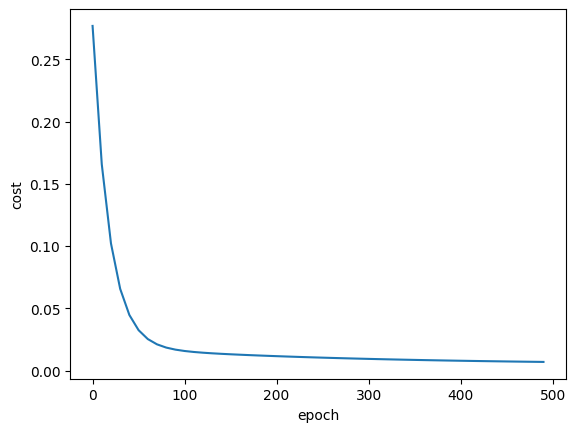

In [40]:
import matplotlib.pyplot as plt

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
plt.show()

In [46]:
def predict(area,bedroom,w,b):
    scaled_X = sx.transform([[area,bedroom]])[0]
    
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    scaled_y = sy.inverse_transform([[scaled_price]])[0][0]
    
    return scaled_y

In [49]:
predict(1200,2,w,b)

C:\Users\HT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(36.83666872271717)

In [52]:
import random

In [67]:
def stochastic_gradient_descent(X,y_true, epochs,learning_rate = 0.01):
    
    number_of_feature = X.shape[1]
    w = np.ones((number_of_feature,))
    b = 0
    total_sample = X.shape[0]
    
    cost_list=[]
    epoch_list = []
    
    for i in range(epochs):
        
        random_index = random.randint(0,total_sample-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_sample)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.square(sample_y-y_predicted)
        if i % 50 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
        
        

In [71]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),100000)
w_sgd, b_sgd, cost_sgd

(array([0.75532305, 0.41766583]),
 np.float64(-0.11655027896499431),
 np.float64(0.0014820531640776765))

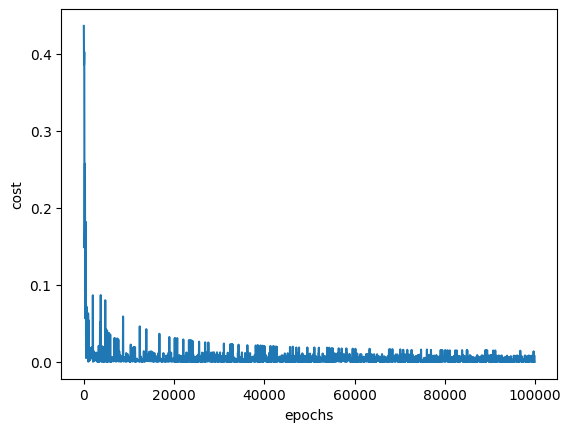

In [72]:
plt.xlabel("epochs")
plt.ylabel("cost")

plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()